# Online News Popularity

## Data Mining

In [1]:
import numpy as np
import pandas as pd
%matplotlib notebook
import scipy.stats
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics 
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
missing_values = ["n/a", "na", "--","-", "", " "]

def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',', na_values = missing_values)
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('OnlineNewsPopularity.csv')
#dataset = load_dataset('OnlineNewsPopularity50p.csv')
#dataset = load_dataset('OnlineNewsPopularity25p.csv')
dataset.drop_duplicates()

print("Database size: ", dataset.shape)

Database size:  (39644, 61)


In [2]:
print("Per comptar el nombre de valors no existents:")
print(dataset.isnull().sum())
print("#############################################")
print(dataset.isnull().values.any())

Per comptar el nombre de valors no existents:
url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64
#############################################
False


In [3]:
print("Per visualitzar la BBDD:")
dataset.head() 

Per visualitzar la BBDD:


url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...     731.000   
1  http://mashable.com/2013/01/07/ap-samsung-spon...     731.000   
2  http://mashable.com/2013/01/07/apple-40-billio...     731.000   
3  http://mashable.com/2013/01/07/astronaut-notre...     731.000   
4   http://mashable.com/2013/01/07/att-u-verse-apps/     731.000   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0           12.000            219.000             0.664              1.000   
1            9.000            255.000             0.605              1.000   
2            9.000            211.000             0.575              1.000   
3            9.000            531.000             0.504              1.000   
4           13.000           1072.000             0.416              1.000   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                      0.815       4.000            2.000      1.000  ...   
1                      0.792       3.000            1.000      1.000  ...   
2                      0.664       3.000            1.000      1.000  ...   
3                      0.666       9.000            0.000      1.000  ...   
4                      0.541      19.000           19.000     20.000  ...   

    min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
0                   0.100                   0.700                  -0.350   
1                   0.033                   0.700                  -0.119   
2                   0.100                   1.000                  -0.467   
3                   0.136                   0.800                  -0.370   
4                   0.033                   1.000                  -0.220   

    min_negative_polarity   max_negative_polarity   title_subjectivity  \
0                  -0.600                  -0.200                0.500   
1                  -0.125                  -0.100                0.000   
2                  -0.800                  -0.133                0.000   
3                  -0.600                  -0.167                0.000   
4                  -0.500                  -0.050                0.455   

    title_sentiment_polarity   abs_title_subjectivity  \
0                     -0.188                    0.000   
1                      0.000                    0.500   
2                      0.000                    0.500   
3                      0.000                    0.500   
4                      0.136                    0.045   

    abs_title_sentiment_polarity   shares  
0                          0.188      593  
1                          0.000      711  
2                          0.000     1500  
3                          0.000     1200  
4                          0.136      505  

[5 rows x 61 columns]

In [268]:
print("Per veure estadístiques dels atributs numèrics de la BBDD:")
dataset.describe()

Per veure estadístiques dels atributs numèrics de la BBDD:


timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count    9911.000         9911.000           9911.000          9911.000   
mean      640.180            9.761            486.508             0.561   
std        55.022            1.965            408.912             0.119   
min       542.000            2.000              0.000             0.000   
25%       593.000            8.000            222.000             0.488   
50%       643.000           10.000            358.000             0.560   
75%       688.000           11.000            626.000             0.634   
max       731.000           18.000           4979.000             1.000   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
count           9911.000                   9911.000    9911.000   
mean               0.992                      0.704       9.927   
std                0.088                      0.122      10.381   
min                0.000                      0.000       0.000   
25%                1.000                      0.643       4.000   
50%                1.000                      0.710       7.000   
75%                1.000                      0.777      12.000   
max                1.000                      1.000     171.000   

        num_self_hrefs   num_imgs   num_videos  ...   min_positive_polarity  \
count         9911.000   9911.000     9911.000  ...                9911.000   
mean             3.313      3.491        1.219  ...                   0.099   
std              4.417      7.646        4.380  ...                   0.071   
min              0.000      0.000        0.000  ...                   0.000   
25%              1.000      0.000        0.000  ...                   0.050   
50%              2.000      1.000        0.000  ...                   0.100   
75%              4.000      1.000        1.000  ...                   0.100   
max             74.000     99.000       75.000  ...                   1.000   

        max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
count                9911.000                9911.000                9911.000   
mean                    0.766                  -0.255                  -0.488   
std                     0.226                   0.127                   0.278   
min                     0.000                  -1.000                  -1.000   
25%                     0.600                  -0.323                  -0.700   
50%                     0.800                  -0.248                  -0.500   
75%                     1.000                  -0.179                  -0.292   
max                     1.000                   0.000                   0.000   

        max_negative_polarity   title_subjectivity   title_sentiment_polarity  \
count                9911.000             9911.000                   9911.000   
mean                   -0.113                0.271                      0.082   
std                     0.098                0.323                      0.261   
min                    -1.000                0.000                     -1.000   
25%                    -0.125                0.000                      0.000   
50%                    -0.100                0.100                      0.000   
75%                    -0.050                0.500                      0.150   
max                     0.000                1.000                      1.000   

        abs_title_subjectivity   abs_title_sentiment_polarity     shares  
count                 9911.000                       9911.000   9911.000  
mean                     0.349                          0.152   3316.705  
std                      0.187                          0.227  14567.618  
min                      0.000                          0.000      4.000  
25%                      0.167                          0.000    977.500  
50%                      0.500                          0.000   1500.000  
75%                      0.500 

<IPython.core.display.Javascript object>


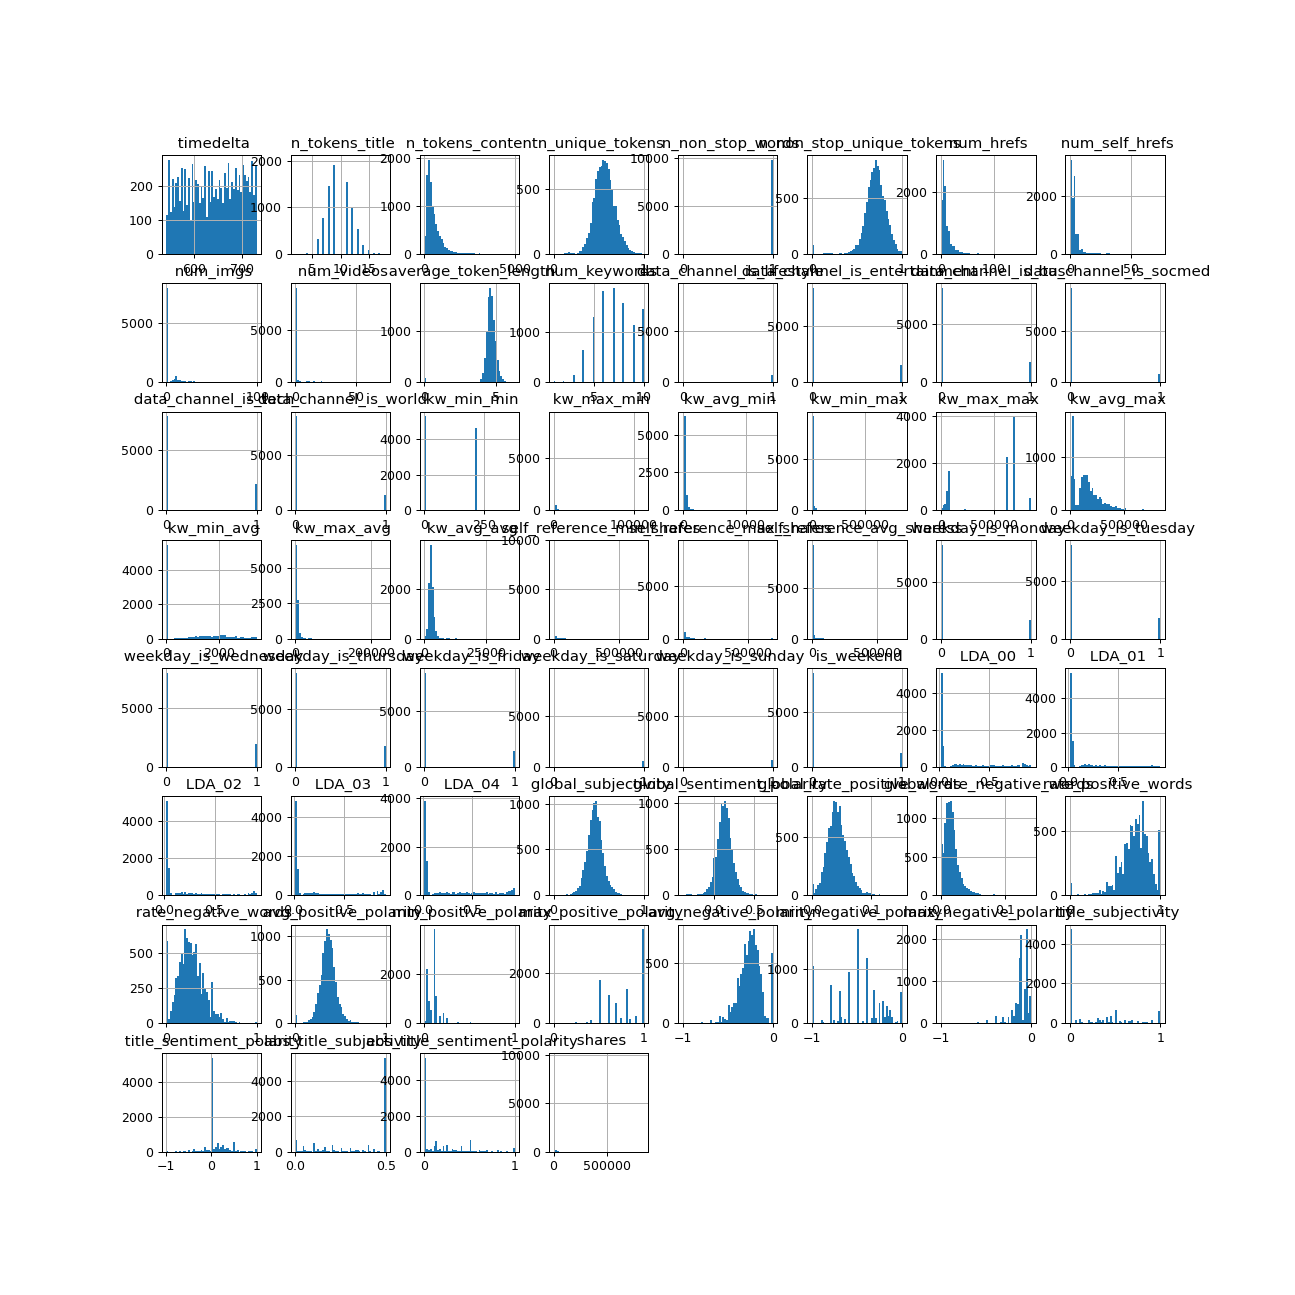

<function matplotlib.pyplot.show(block=None)>

In [10]:
dataset.hist(bins=50, figsize= (16,16))
plt.show

<IPython.core.display.Javascript object>


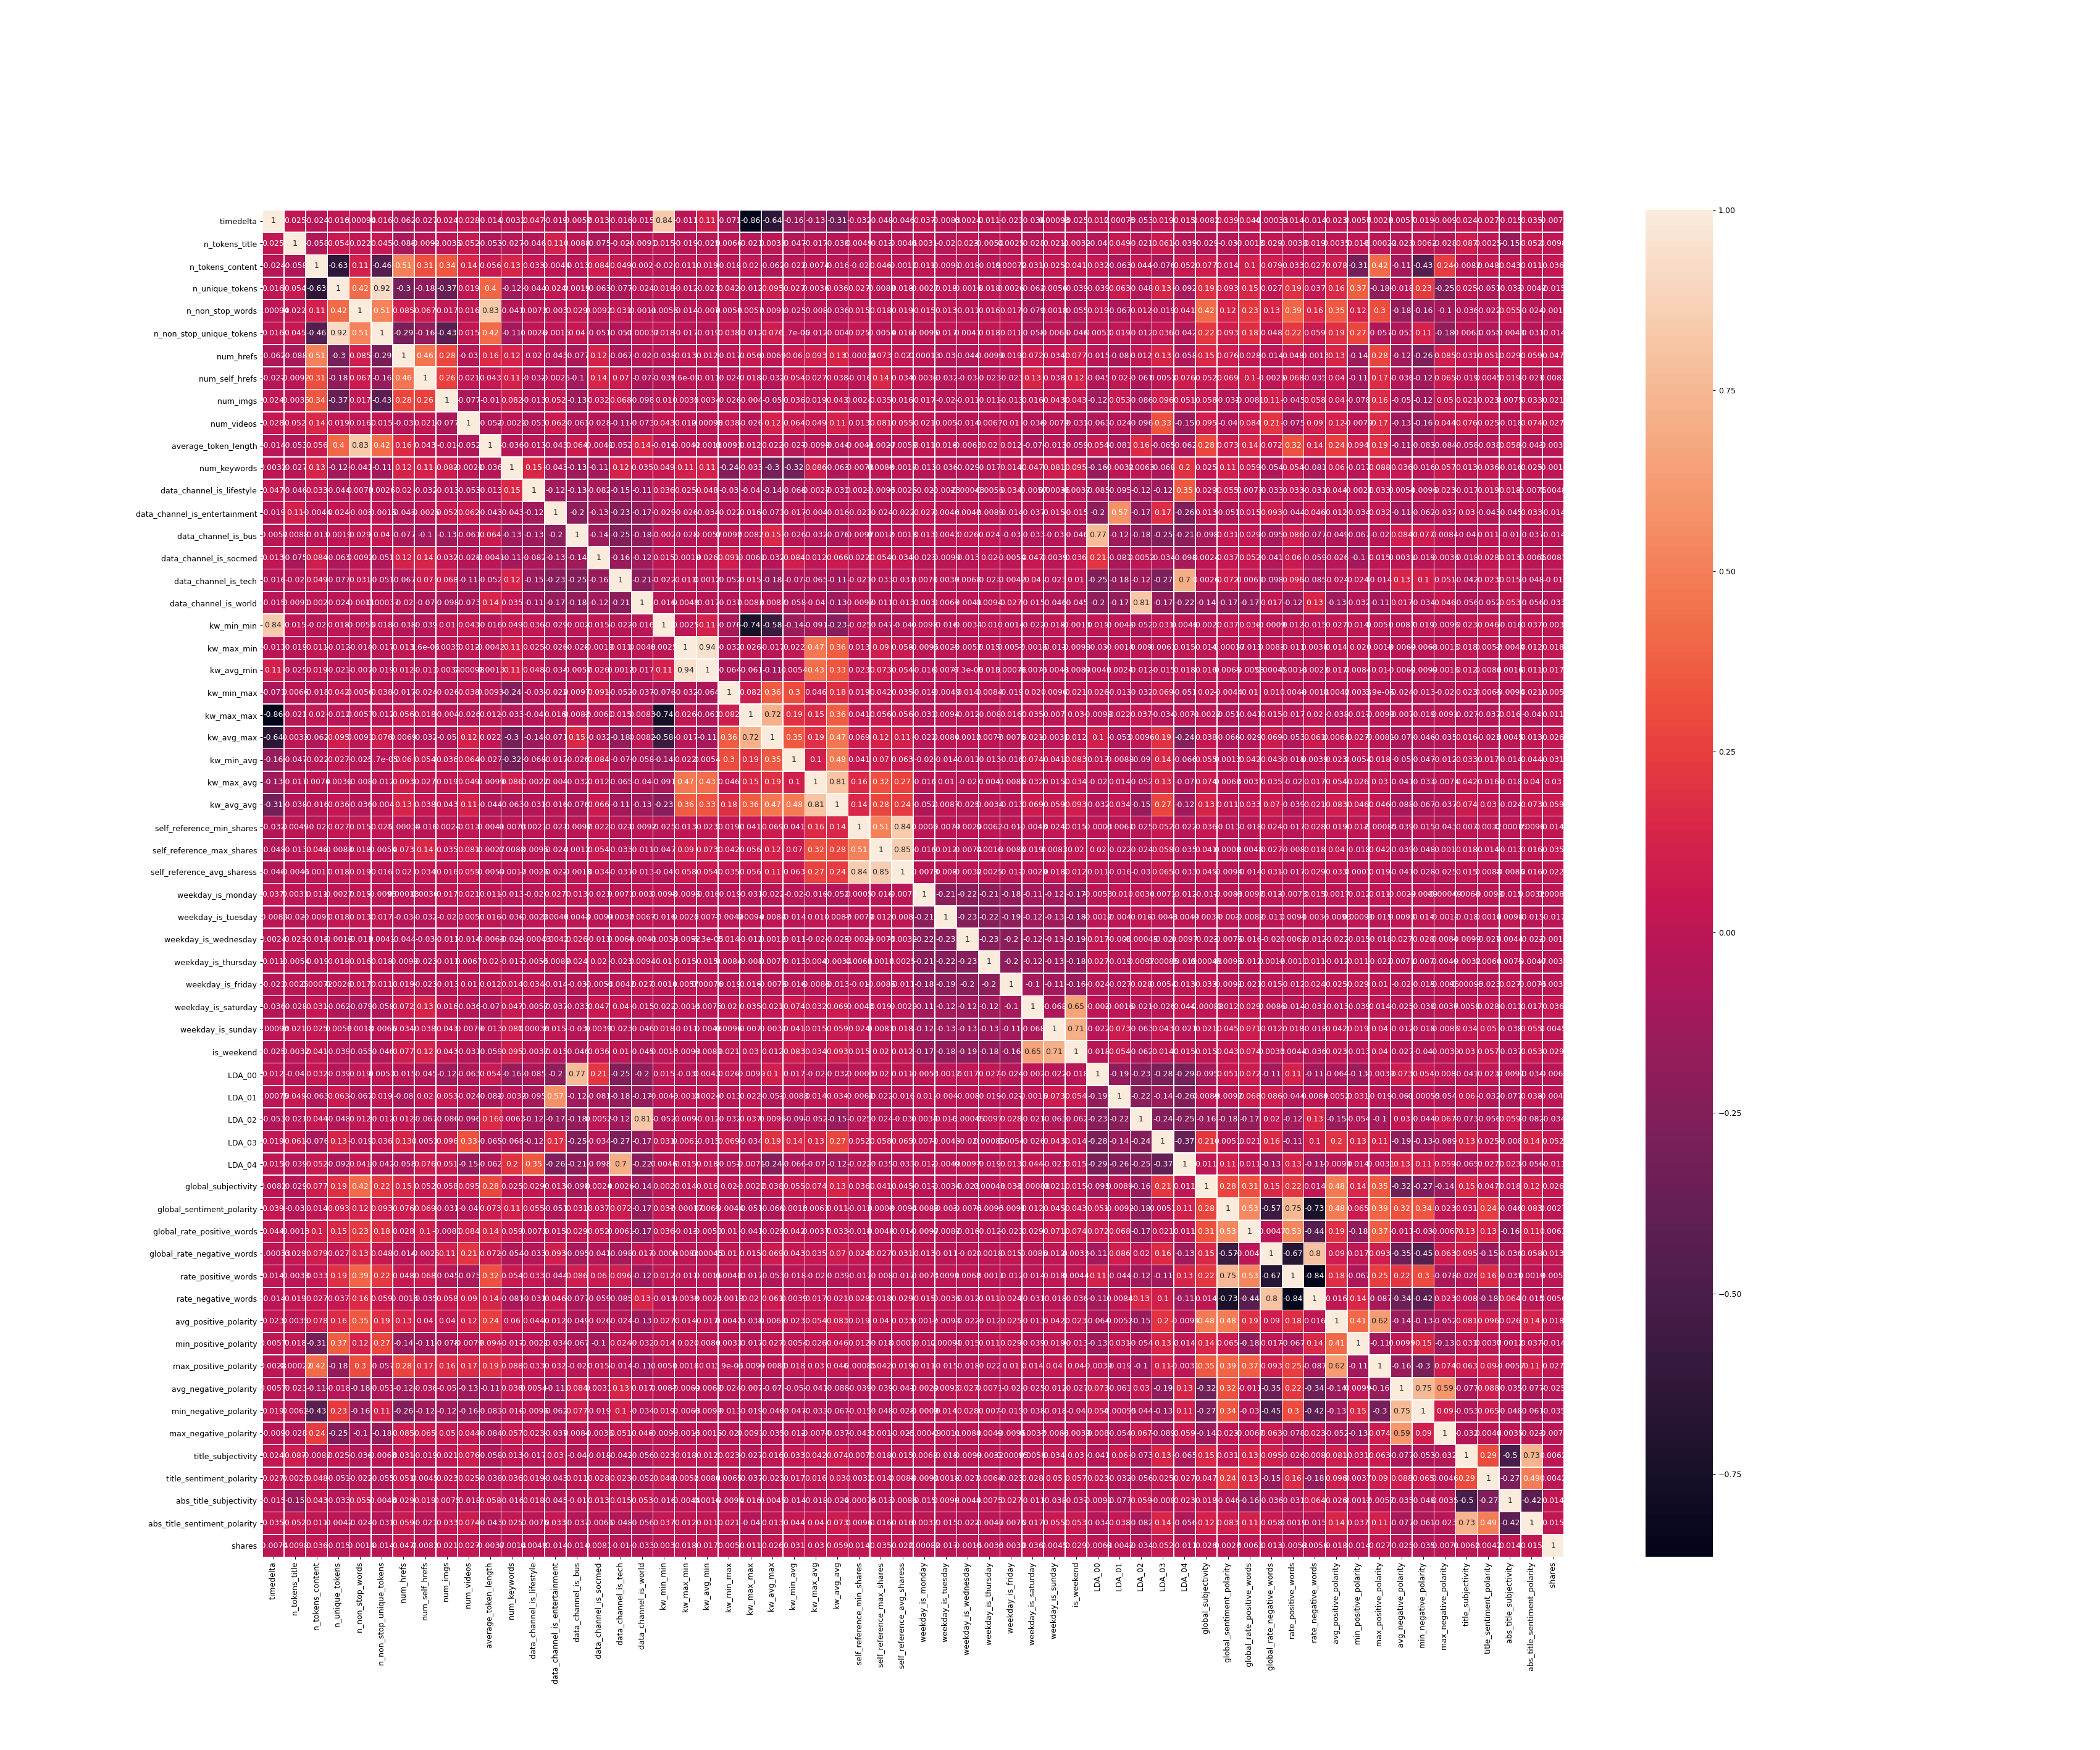

In [12]:
# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = dataset.corr()

plt.figure(figsize=(42, 35))

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

Com podem veure en la matriu de correlació, els atributs **n_unique_tokens** (percentatge de paraules úniques al contingut), **n_non_stop_words** (percentatge de paraules sense parar al contingut), **n_non_stop_unique_tokens** (percentatge de paraules úniques sense parar al contingut), **kw_max_min** (pitjor paraula clau (compartiments màxims)), **kw_avg_min** (pitjor paraula clau (comparticions mitjanes)) estan directment relcionats, fent que siguin linealment dependents. 

Y els atributs **kw_max_avg** (mitjana. paraula clau (màx. comparticions)), **kw_avg_avg** (mitjana. paraula clau (mitjana compartida)), **self_reference_min_shares** (mín. comparticions d'articles de referència a Mashable), **self_reference_max_shares** (màx. comparticions d'articles de referència a Mashable), **self_reference_avg_sharess** (mitjana. comparticions d'articles de referència a Mashable) com es pot intuir els **avg** es la mitjana dels altres atributs amb el nom similar.

Gracies a aixó, podem decidir eliminar un atribut per parella o les mitjanes per simplificar més la nostra base de dades i així evitar un posible *overfitting* a futur. 

In [64]:
dataset1=dataset.drop([' n_non_stop_words',' n_unique_tokens',' kw_avg_min',' kw_avg_avg',' self_reference_avg_sharess', 'url'],axis=1)

x = dataset1.drop([' shares'], axis=1)
y = dataset1[' shares']

print("Dimensionalitat de la BBDD:", dataset1.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

print("Per visualitzar la BBDD:")
dataset1

Dimensionalitat de la BBDD: (39644, 55)
Dimensionalitat de les entrades X (39644, 54)
Dimensionalitat de l'atribut Y (39644,)
Per visualitzar la BBDD:


timedelta   n_tokens_title   n_tokens_content  \
0         731.000           12.000            219.000   
1         731.000            9.000            255.000   
2         731.000            9.000            211.000   
3         731.000            9.000            531.000   
4         731.000           13.000           1072.000   
...           ...              ...                ...   
39639       8.000           11.000            346.000   
39640       8.000           12.000            328.000   
39641       8.000           10.000            442.000   
39642       8.000            6.000            682.000   
39643       8.000           10.000            157.000   

        n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
0                          0.815       4.000            2.000      1.000   
1                          0.792       3.000            1.000      1.000   
2                          0.664       3.000            1.000      1.000   
3                          0.666       9.000            0.000      1.000   
4                          0.541      19.000           19.000     20.000   
...                          ...         ...              ...        ...   
39639                      0.685       9.000            7.000      1.000   
39640                      0.885       9.000            7.000      3.000   
39641                      0.644      24.000            1.000     12.000   
39642                      0.693      10.000            1.000      1.000   
39643                      0.846       1.000            1.000      0.000   

        num_videos   average_token_length   num_keywords  ...  \
0            0.000                  4.680          5.000  ...   
1            0.000                  4.914          4.000  ...   
2            0.000                  4.393          6.000  ...   
3            0.000                  4.405          7.000  ...   
4            0.000                  4.683          7.000  ...   
...            ...                    ...            ...  ...   
39639        1.000                  4.523          8.000  ...   
39640       48.000                  4.405          7.000  ...   
39641        1.000                  5.077          8.000  ...   
39642        0.000                  4.975          5.000  ...   
39643        2.000                  4.471          4.000  ...   

        min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
0                       0.100                   0.700                  -0.350   
1                       0.033                   0.700                  -0.119   
2                       0.100                   1.000                  -0.467   
3                       0.136                   0.800                  -0.370   
4                       0.033                   1.000                  -0.220   
...                       ...                     ...                     ...   
39639                   0.100                   0.750                  -0.260   
39640                   0.136                   0.700                  -0.211   
39641                   0.136                   0.500                  -0.356   
39642                   0.062                   0.500                  -0.205   
39643                   0.100                   0.500                  -0.200   

        min_negative_polarity   max_negative_polarity   title_subjectivity  \
0                      -0.600                  -0.200                0.500   
1                      -0.125                  -0.100                0.000   
2                      -0.800                  -0.133                0.000   
3                      -0.600                  -0.167                0.000   
4                      -0.500                  -0.050                0.455   
...                       ...                     ...                  ...   
39639                  -0.500                  -0.125                0.100   
39640                  -0.400   

<IPython.core.display.Javascript object>


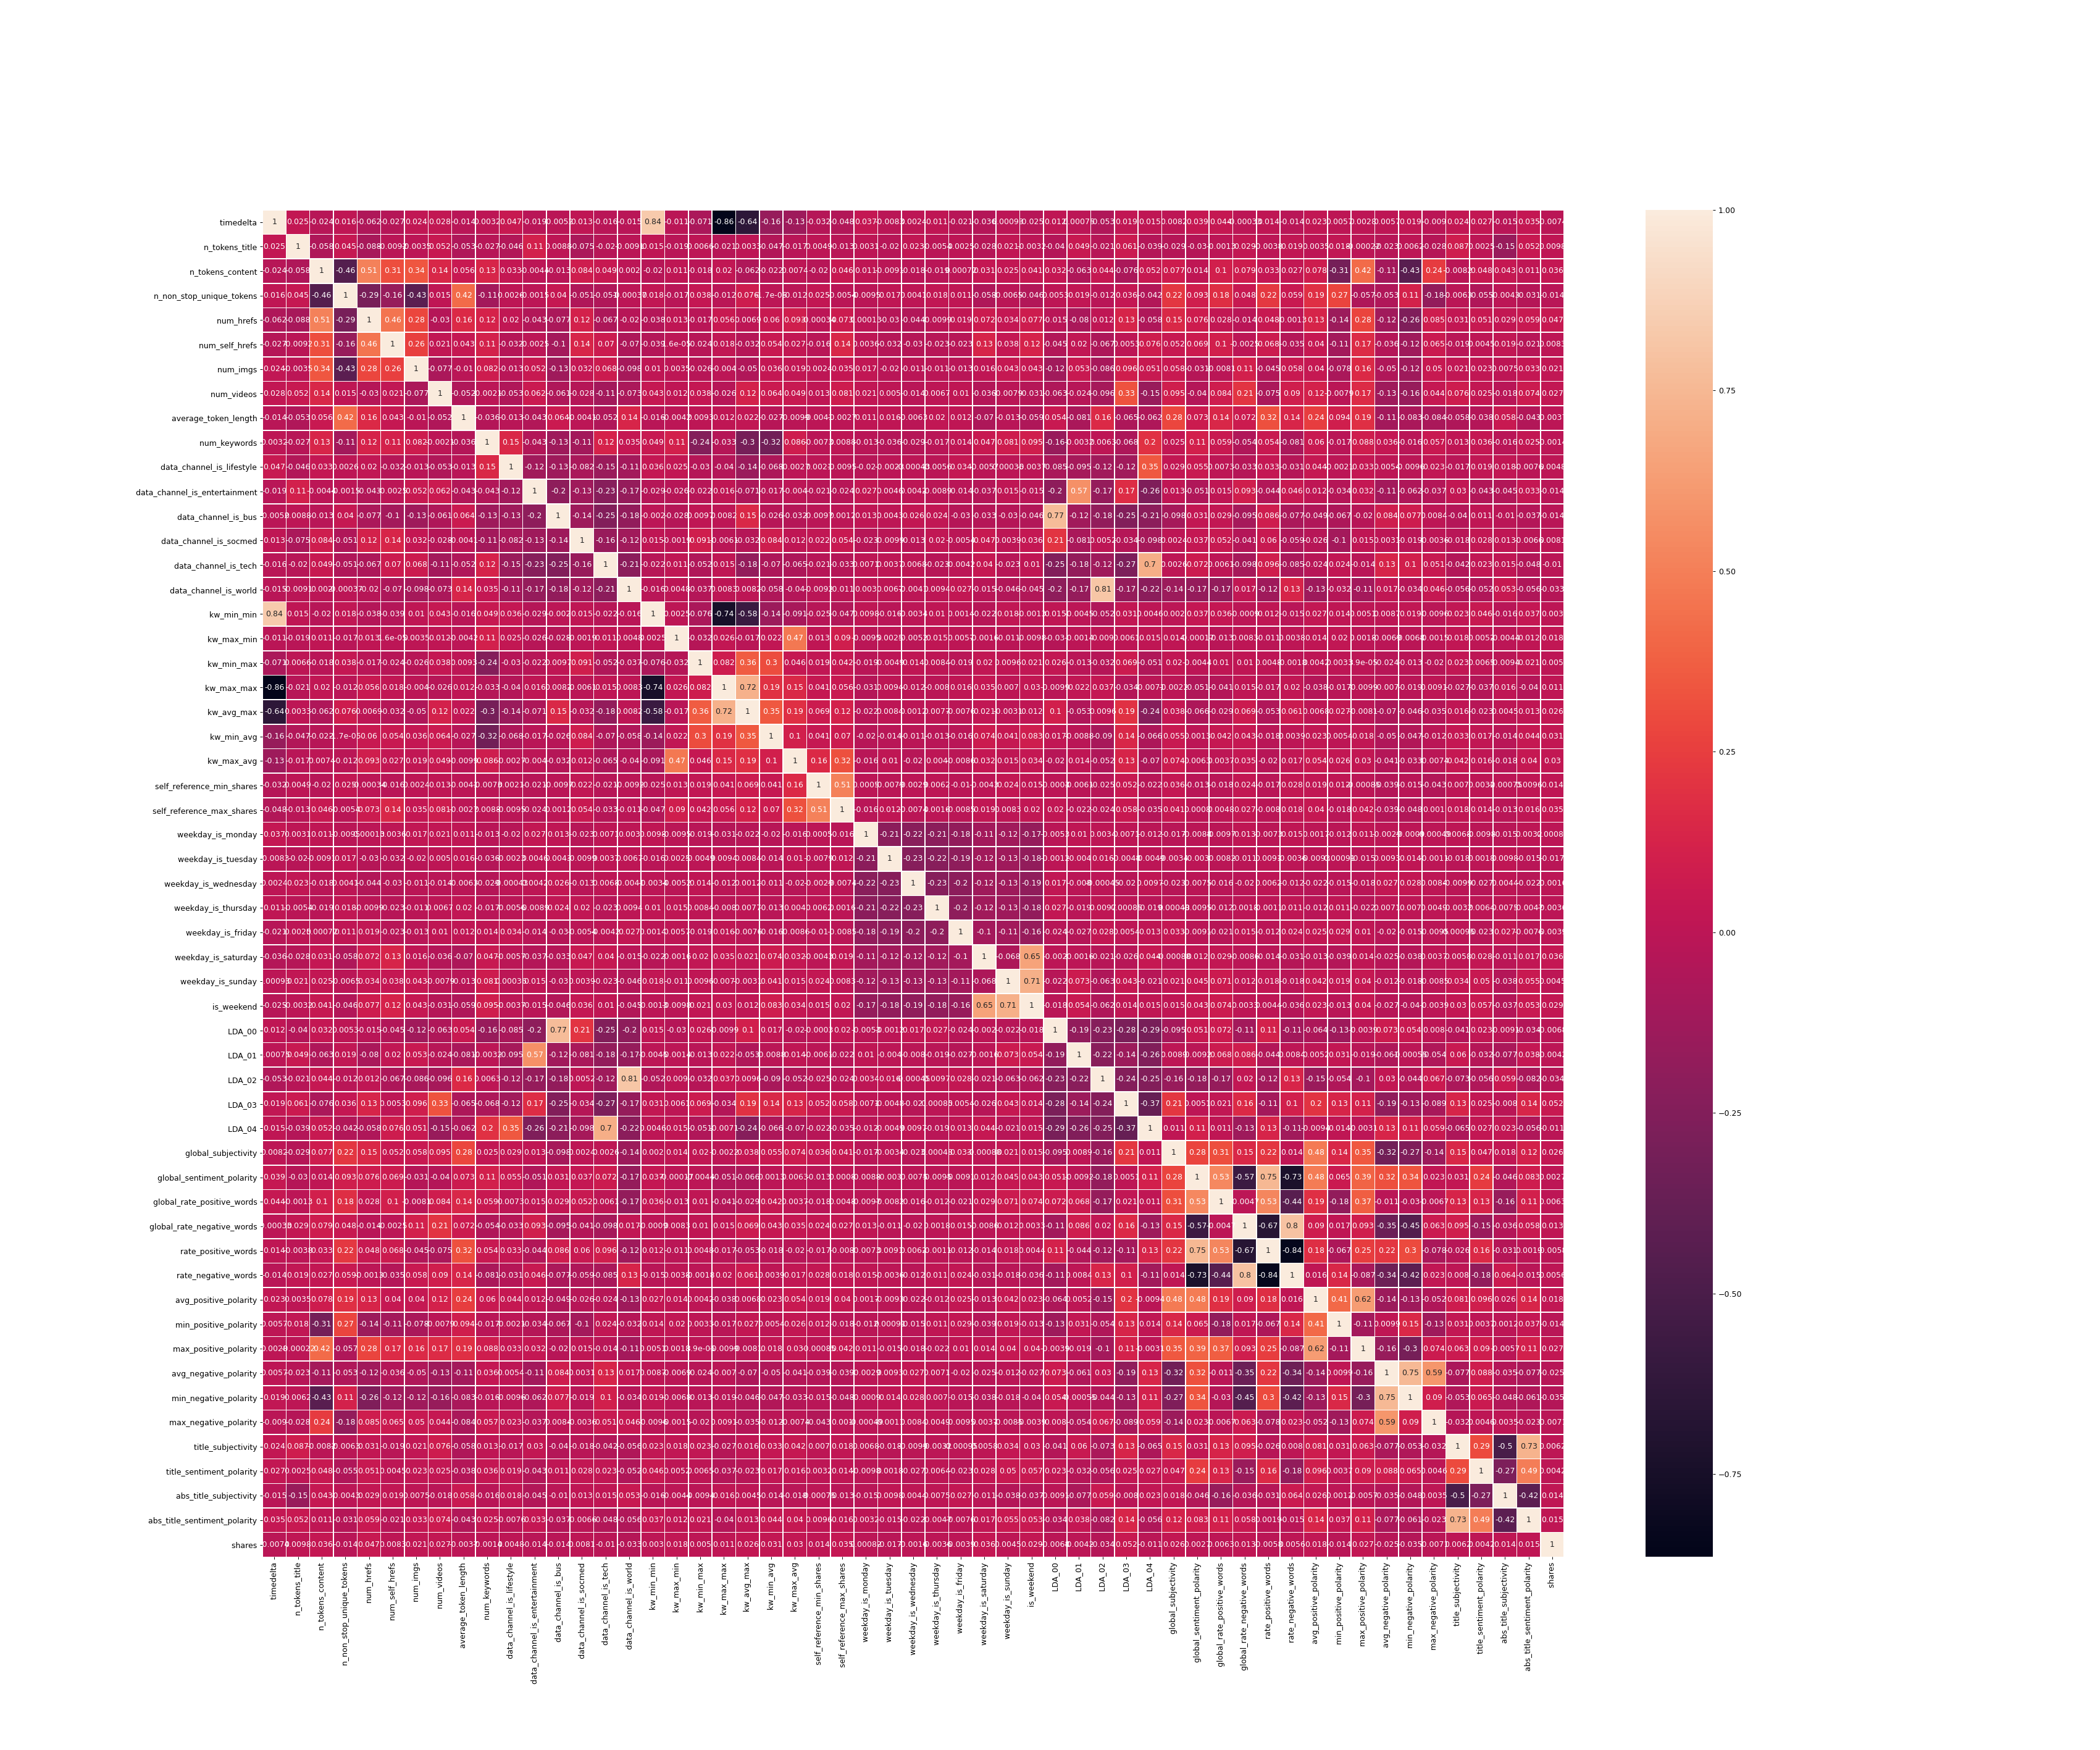

In [36]:
# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = dataset1.corr()

plt.figure(figsize=(42, 35))

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

<IPython.core.display.Javascript object>


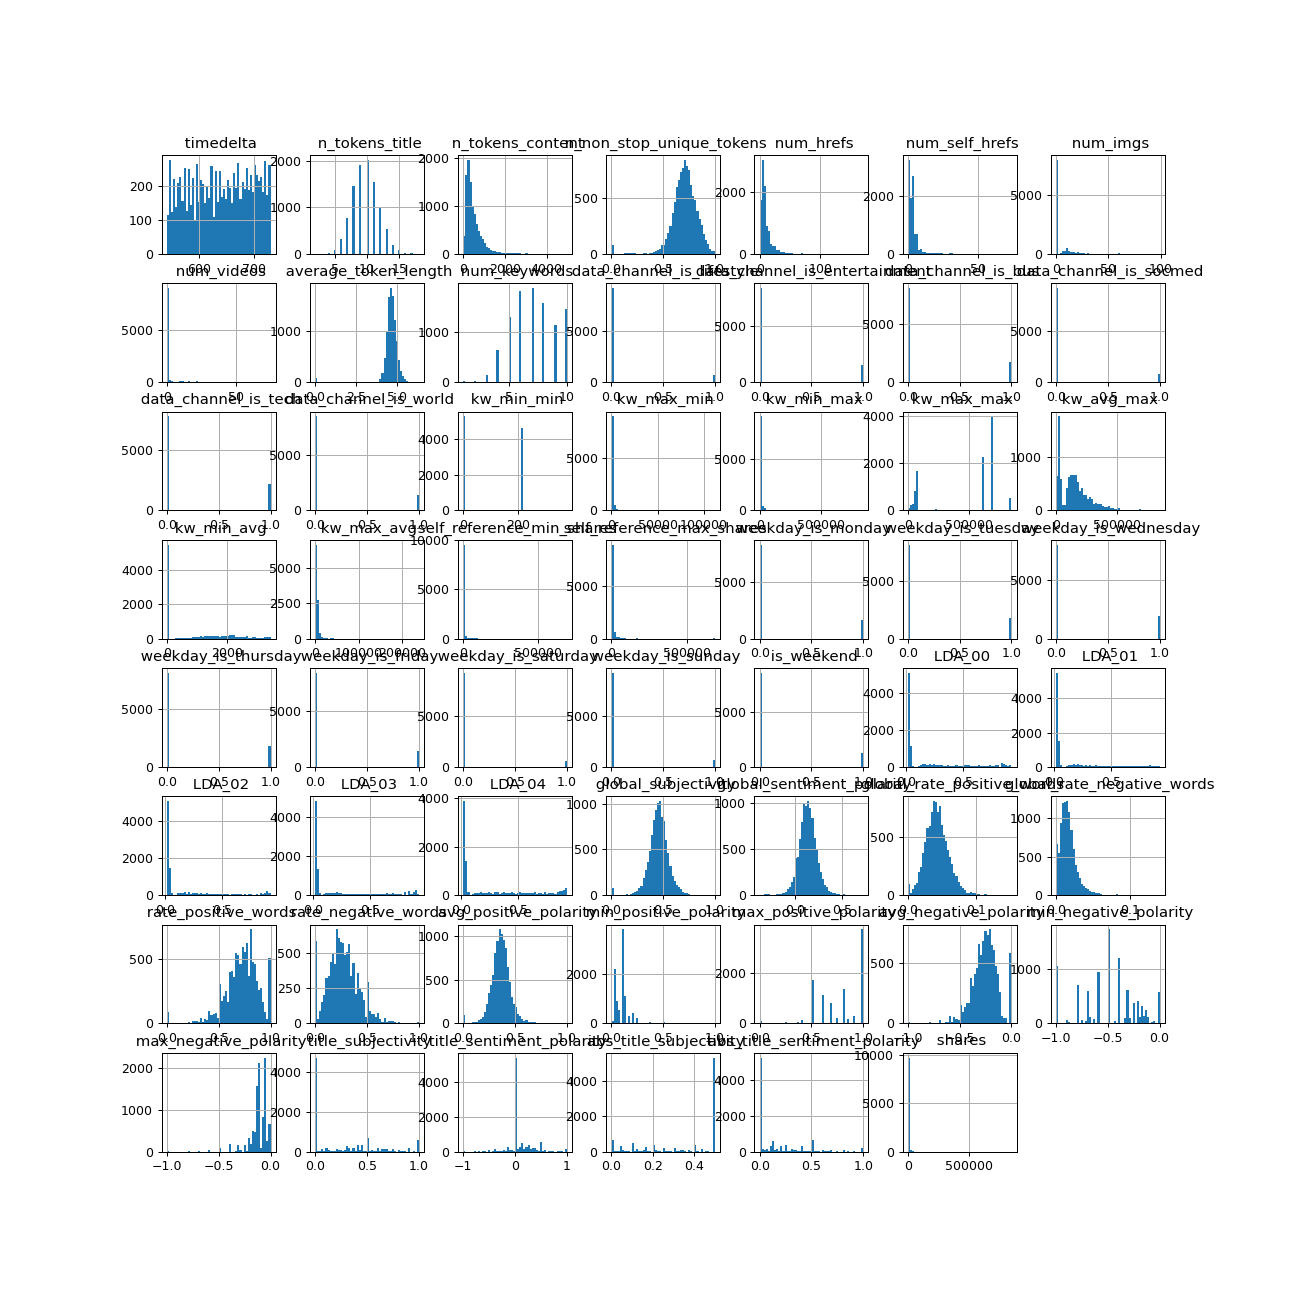

<function matplotlib.pyplot.show(block=None)>

In [37]:
dataset1.hist(bins=50, figsize= (16,16))
plt.show

Després de fer la neteja dels atributs, podem veure en el Heatmap que els atributs que tenen més correlació son:
    **LDA_00** (Proximitat amb el tema LDA 0)    - **data_channel_is_bus** (el canal de dades és 'Business'?)
    **LDA_02** (Proximitat amb el tema 2 de LDA) - **data_channel_is_world** (el canal de dades és "Món"?)
    **LDA_04** (Proximitat amb el tema 4 de LDA) - **data_channel_is_tech** (el canal de dades és "Tech"?)
    
I també el atribut **Shares** per veure la seva distribució.

<IPython.core.display.Javascript object>


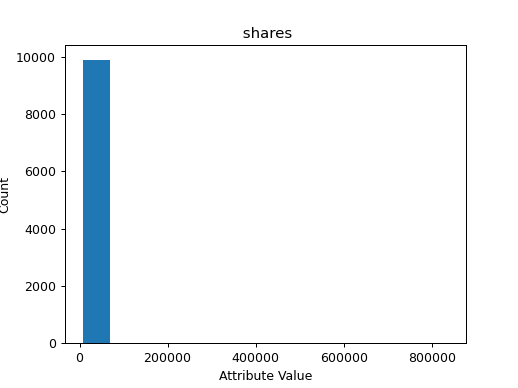

<IPython.core.display.Javascript object>


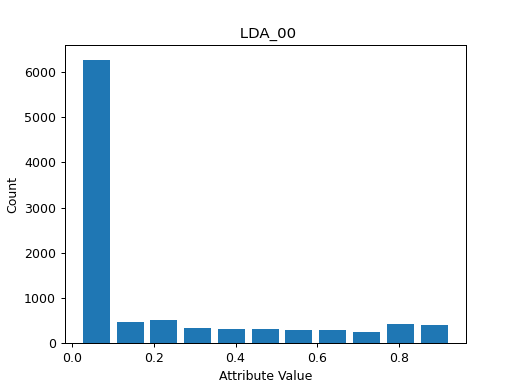

<IPython.core.display.Javascript object>


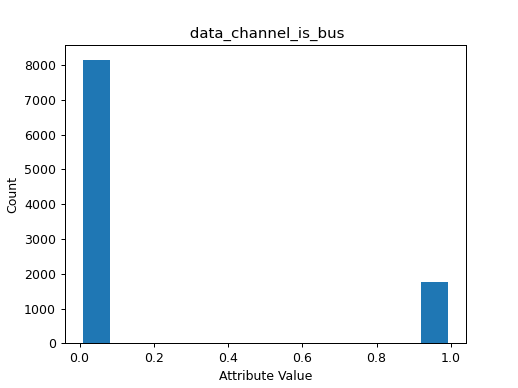

<IPython.core.display.Javascript object>


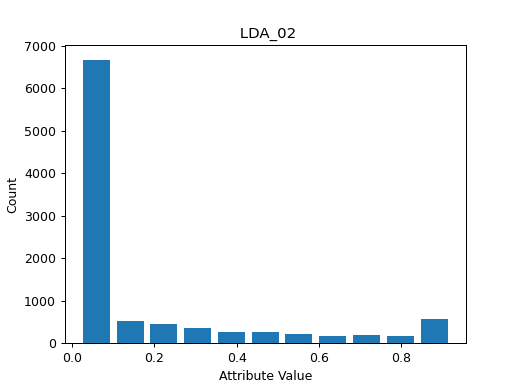

<IPython.core.display.Javascript object>


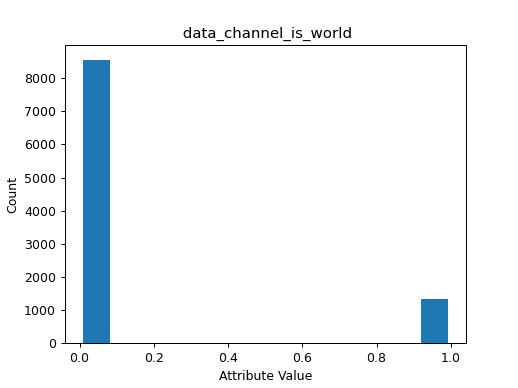

<IPython.core.display.Javascript object>


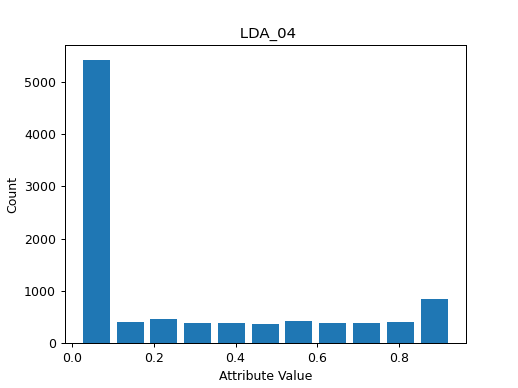

<IPython.core.display.Javascript object>


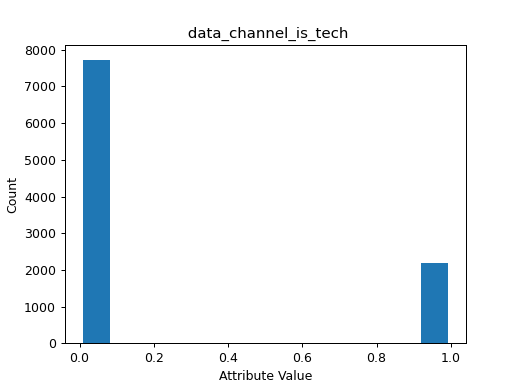

In [42]:
atributs = [' shares', ' LDA_00', ' data_channel_is_bus', ' LDA_02', ' data_channel_is_world', ' LDA_04', ' data_channel_is_tech']
for i in atributs:
    plt.figure()
    plt.title(i)
    plt.xlabel("Attribute Value")
    plt.ylabel("Count")
    hist = plt.hist(dataset1[i], bins=11, range=[np.min(dataset1[i]), np.max(dataset1[i])], histtype="bar", rwidth=0.8)

## Model Learning

Per poder fer el Model Learning, vaig decidir convertir les dades de **shares** a una distribució on pot ser **0** o **1**, que significará si la página es popular o no. 

Per pòder fer aixó, abans estandaritzem les dades de les variables que no son el **target** amb el **Min Max Scaler**

In [65]:
from sklearn.preprocessing import StandardScaler
import math

x = dataset1.drop([' shares'], axis=1)
y = dataset1[' shares']

minmax_scaler = preprocessing.MinMaxScaler()
X = minmax_scaler.fit_transform(x)
X = pd.DataFrame(X)

Per poder cambiar la variable **shares** a 1 i 0, vaig buscar com calcular els valors atípics per després no tenir en compte aquests valors per calcular una mitjana més real i a partir d'aquesta mitjana definir un rang per convertir els valors a 0 o 1.

Els pasos per fer aixó són els següents:
1. Calcular el primer i el tercer quartil.
2. Calcular el rang interquartil
3. Els valors que siguin més petits que **Q1 - 1.5 vegades el valor del rang** o mayors que **Q3 + 1.5 vegades el valor del rang**
4. Pasar de **Shares** a altres valors que serien la **Vilaritat**, si la página es viral, llavors sera atipic
5. Pasar els valors de **Shares** a **1** si son iguals o superiors a aquest valor atipic, i si no, serán **0** 

In [66]:
Q1 = np.percentile(dataset1[' shares'], 25)
Q2 = np.percentile(dataset1[' shares'], 50)
Q3 = np.percentile(dataset1[' shares'], 75)

print("Primer Quartil: ", Q1)
print("Segon Quartil: ", Q2)
print("Tercer Quartil: ", Q3)

IQR = np.percentile(dataset1[' shares'], 75) -  np.percentile(dataset1[' shares'], 25)
print("Rang Interquartil: ", IQR)

rang_inferior = Q1 - (1.5 * IQR)
rang_superior = Q3 + (1.5 * IQR)

print("Rang inferior: ", rang_inferior)
print("Rang superior: ", rang_superior)

Primer Quartil:  946.0
Segon Quartil:  1400.0
Tercer Quartil:  2800.0
Rang Interquartil:  1854.0
Rang inferior:  -1835.0
Rang superior:  5581.0


In [67]:
y_values = dataset1[' shares'].values
Y = []

for i in y_values:
    if i > 5533:
        Y.append(1)
    else:
        Y.append(0)
        
print("Mida del Y: ", len(Y))

Mida del Y:  39644


In [68]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

### Random Forest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

random_forest = RandomForestClassifier(min_samples_split=9, random_state=42)
random_forest.fit(x_train, y_train)
predicted_test = random_forest.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted_test)))
print('Coeficient de determinació del model:', random_forest.score(x_test, y_test))
random_forest_cv = cross_val_score(random_forest, x_train, y_train, cv=10)
print("Cross Validation Score: ", random_forest_cv.mean())

Mean Absolute Error: 0.11489469037709674
Mean Squared Error: 0.11489469037709674
Root Mean Squared Error: 0.338961193025244
Coeficient de determinació del model: 0.8851053096229032
Cross Validation Score:  0.88532237494348


### Decision Tree Classifier 

In [70]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42).fit(x_train, y_train)
predicted_test = decision_tree.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted_test)))
print('Coeficient de determinació del model:', decision_tree.score(x_test, y_test))
decision_tree_cv = cross_val_score(decision_tree, x_train, y_train, cv=10)
print("Cross Validation Score: ", decision_tree_cv.mean())

Mean Absolute Error: 0.20103417833270273
Mean Squared Error: 0.20103417833270273
Root Mean Squared Error: 0.44836835117200535
Coeficient de determinació del model: 0.7989658216672972
Cross Validation Score:  0.797666381134517


### Ada Boost Clssifier

In [71]:
from sklearn.ensemble import AdaBoostClassifier

ABC = AdaBoostClassifier(n_estimators=100, random_state=42).fit(x_train, y_train)
predicted_test = ABC.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted_test)))
print('Coeficient de determinació del model:', ABC.score(x_test, y_test))
ABC_cv = cross_val_score(ABC, x_train, y_train, cv=10)
print("Cross Validation Score: ", ABC_cv.mean())

Mean Absolute Error: 0.11766931517215286
Mean Squared Error: 0.11766931517215286
Root Mean Squared Error: 0.34302961267528037
Coeficient de determinació del model: 0.8823306848278472
Cross Validation Score:  0.8841243329463936


He decidit escollir aquests algorismes, perque com hem vist en el analisis de dades, totes les varibles no tenen molta correlció, i gastar recursos i temps en millrorar aixó seria una perdua de temps.

Aquests algorismes son els millors, ja que tenen una estrategia de utilitzar varis filtres per aconseguir uns millors resultat o mirar quin variable es el millor per tenir més en compte.


## Anàlisi de resultats


| - | Random Forest | Decision Tree | Ada Boost |
| --- | --- | --- | --- |
| CV score | 0.885 | 0.797 | 0.884 |

Com podem veure en els resultats del Cross Validation Score, el algorisme d'aprenentatge que millor funciona es el **Random Forest Classifier**.

Es comprensible ja que es el algorisme que millor funciona en una base de dades on hi han molts variables que no tenen molt pés i no tenen moltes correlacións entre ells.

Graciés al analisis de dades que hem fet en un principi, hem netejat les variables que no aportarien rés important a l'entrenament. A més de convertir la variable **Shares** a unes dades binaries que diuen si la página web es viral o no.